In [14]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from SciKit.utils import show_report, split_500_hits
import matplotlib.pyplot as plt

In [15]:
# load data
X_train, X_test, y_train, y_test = split_500_hits()

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
# build model
model = DecisionTreeClassifier()
default_params = model.get_params()

print(default_params)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


              precision    recall  f1-score   support

           0       0.74      0.87      0.80        53
           1       0.77      0.60      0.68        40

    accuracy                           0.75        93
   macro avg       0.76      0.73      0.74        93
weighted avg       0.76      0.75      0.75        93

Accuracy:  0.7526881720430108
Confusion Matrix: 
 [[46  7]
 [16 24]]


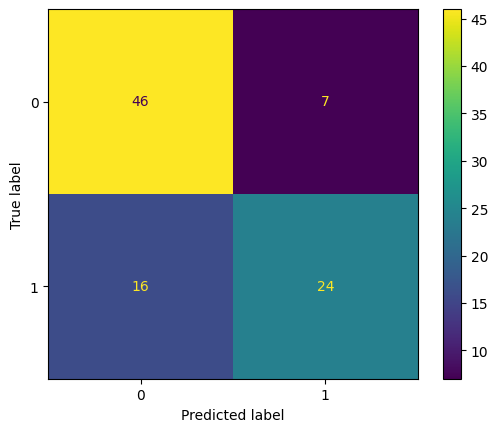

In [18]:
show_report(y_test, y_pred)

In [20]:
feature_importance = pd.Series(model.feature_importances_,
                               index=model.feature_importances_.columns
                               ).sort_values(ascending=True)
plt.barh(X_train.columns, feature_importance)
plt.show()

KeyboardInterrupt: 

In [ ]:
# improve model 
dct2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04)
dct2.fit(X_train, y_train)
y_pred2 = dct2.predict(X_test)

show_report(y_test, y_pred2)

In [ ]:
features2 = pd.Series(dct2.feature_importances_, index=X_train.columns).sort_values(ascending=True)
print(features2)